###  Signal visualization of C/m5C/hm5C

This script takes signals extracted from fast5 files as input for UMAP visualization. The raw fast5 files used in this script are publicly availbale at SRA database under the accession number [SRP166020](https://www.ncbi.nlm.nih.gov/sra/?term=SRP166020). The signal extraction procedure aligns with the [data preprocessing workflow](https://yulab2021.github.io/TandemMod_document/data_preprocessing.html) outlined in our document.

motif: AGCCA


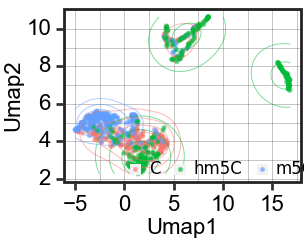

In [3]:
#signal Umap C m5C hm5C
from scipy import interpolate
import traceback
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def interp(x):
    """
    Performs linear interpolation on a given list of values.

    Args:
        x (list): List of values to be interpolated.

    Returns:
        list: Interpolated values.

    """
    l=len(x)
    y=x
    x=np.linspace(0,l-1,l)
    f=interpolate.interp1d(x,y,kind='slinear')
    x_new=np.linspace(0,l-1,100)
    y_new=f(x_new)
    y_new=np.around(y_new,4)
    return y_new.tolist()
    

ref_file="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
ref_dict={}
with open(ref_file) as f:
    for line in f:
        line=line.rstrip()
        if ">" in line:
            chr=line[1:]
        else:
            seq=line
            ref_dict[chr]=seq


chr="C2"
site=175

motif=ref_dict[chr][site-2:site+3]
print("motif:",motif)

X=[]
Y=[]
label_dict={0:"C",1:"m5C",2:"hm5C"}

signal_files=["/home/wuyou/Projects/paper/ELIGOS_normalC/normalC.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_m5C/m5C.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_hm5C/hm5C.signal.tsv"]
for j,signal_file in enumerate(signal_files):
    with open(signal_file) as f:
        count=0
        for line in f:
            line=line.rstrip()
            chr=line.split("\t")[1]
            start=int(line.split("\t")[2])
            seq=line.split("\t")[3]
            signal_string=line.split("\t")[6]
            raw_signal=[base_signal_string.split("*") for base_signal_string in signal_string.split("|")]  
            if start > site or start+len(seq)-3<site or chr != "C2":
                continue
            kmer_raw_signal=raw_signal[site-(start-1)-2:site-(start-1)+3]
            kmer_sequence=seq[site-(start-1)-2:site-(start-1)+3]
            if len(kmer_raw_signal)==0:
                continue

            x=[]
            for i in range(5):                                 #resample to 500 points
                kmer_raw_signal[i]=interp(np.array(kmer_raw_signal[i],dtype=float))
                x.extend(kmer_raw_signal[i])
            X.append(x)
            Y.append(label_dict[j])
            count+=1
            if count>250:
                break

 
            
#reducer = PCA(n_components=2)
reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(X)


#"#F8766D" "#00BA38" "#619CFF"
#color
black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


data=pd.DataFrame(embedding)
data.columns=["Umap1","Umap2"]
data["label"]=Y
data["A"]=[0]*len(Y)

data_C=data[data["label"]=="C"]
data_m5C=data[data["label"]=="m5C"]
data_hm5C=data[data["label"]=="hm5C"]

data.to_csv("data/Umap_embedding_of_C_m5C_hm5C_signals.csv")

p =(ggplot(aes(x='Umap1', y='Umap2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=0.5)
    +theme(
        figure_size=[1.52,1.22],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.73,0.35), 
        legend_key_size=4) #change legend text font size))
    +scale_color_manual(values =[c1, c2, c3]) 
    +geom_density_2d(colour = "#F8766D",size=0.2,data=data_C,alpha=0.5)
    +geom_density_2d(colour = "#00BA38",size=0.2,data=data_hm5C,alpha=0.5)
    +geom_density_2d(colour = "#619CFF",size=0.2,data=data_m5C,alpha=0.5)
    +scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/figure_1d_signal_visualization_C_m5C_hm5C.pdf')

### Signal visualizatioin of A/m1A/m6A

motif: TGAGT


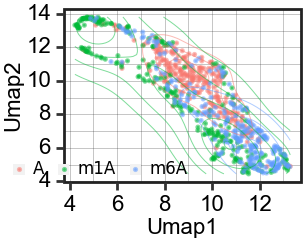

In [4]:
#signal Umap A m1A m6A
from scipy import interpolate
import traceback
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def interp(x):
    """
    Performs linear interpolation on a given list of values.

    Args:
        x (list): List of values to be interpolated.

    Returns:
        list: Interpolated values.

    """
    l=len(x)
    y=x
    x=np.linspace(0,l-1,l)
    f=interpolate.interp1d(x,y,kind='slinear')
    x_new=np.linspace(0,l-1,100)
    y_new=f(x_new)
    y_new=np.around(y_new,4)
    return y_new.tolist()

ref_file="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
ref_dict={}
with open(ref_file) as f:
    for line in f:
        line=line.rstrip()
        if ">" in line:
            chr=line[1:]
        else:
            seq=line
            ref_dict[chr]=seq


chr="A2"
site=145

motif=ref_dict[chr][site-2:site+3]
print("motif:",motif)

X=[]
Y=[]
label_dict={0:"A",1:"m1A",2:"m6A"}

signal_files=["/home/wuyou/Projects/paper/ELIGOS_normalA/normalA.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_m1A/m1A.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_m6A/m6A.signal.tsv"]

for j,signal_file in enumerate(signal_files):
    with open(signal_file) as f:
        count=0
        for line in f:
            line=line.rstrip()
            chr=line.split("\t")[1]
            start=int(line.split("\t")[2])
            seq=line.split("\t")[3]
            signal_string=line.split("\t")[6]
            raw_signal=[base_signal_string.split("*") for base_signal_string in signal_string.split("|")]  
            if start > site or start+len(seq)-3<site or chr != "A2":
                continue
            kmer_raw_signal=raw_signal[site-(start-1)-2:site-(start-1)+3]
            kmer_sequence=seq[site-(start-1)-2:site-(start-1)+3]
            if len(kmer_raw_signal)==0:
                continue


            x=[]
            for i in range(5):                 #resample to 500 points
                kmer_raw_signal[i]=interp(np.array(kmer_raw_signal[i],dtype=float))
                x.extend(kmer_raw_signal[i])
            X.append(x)
            Y.append(label_dict[j])
            count+=1
            if count>250:
                break

 
            
#reducer = PCA(n_components=2)
reducer=umap.UMAP(random_state=4)
embedding = reducer.fit_transform(X)


#"#F8766D" "#00BA38" "#619CFF"
black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


data=pd.DataFrame(embedding)
data.columns=["Umap1","Umap2"]
data["label"]=Y
data["A"]=[0]*len(Y)

data_A=data[data["label"]=="A"]
data_m1A=data[data["label"]=="m1A"]
data_m6A=data[data["label"]=="m6A"]

data.to_csv("data/Umap_embedding_of_A_m1A_m6A_signals.csv")

p =(ggplot(aes(x='Umap1', y='Umap2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=0.5)
    +theme(
        figure_size=[1.52,1.22],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.33,0.35), 
        legend_key_size=4) #change legend text font size))
    +scale_color_manual(values =[c1, c2, c3]) 
    +geom_density_2d(colour = "#F8766D",size=0.2,data=data_A,alpha=0.5)
    +geom_density_2d(colour = "#00BA38",size=0.2,data=data_m1A,alpha=0.5)
    +geom_density_2d(colour = "#619CFF",size=0.2,data=data_m6A,alpha=0.5)
    +scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/figure_1d_signal_visualization_A_m1A_m6A.pdf')

### Signal visualization of U/psU

motif: ACTAA


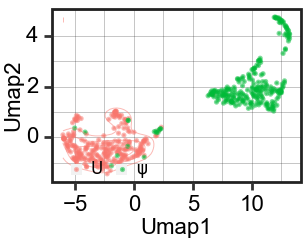

In [6]:
from scipy import interpolate
import traceback
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def interp(x):
    """
    Performs linear interpolation on a given list of values.

    Args:
        x (list): List of values to be interpolated.

    Returns:
        list: Interpolated values.

    """
    l=len(x)
    y=x
    x=np.linspace(0,l-1,l)
    f=interpolate.interp1d(x,y,kind='slinear')
    x_new=np.linspace(0,l-1,100)
    y_new=f(x_new)
    y_new=np.around(y_new,4)
    return y_new.tolist()

ref_file="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
ref_dict={}
with open(ref_file) as f:
    for line in f:
        line=line.rstrip()
        if ">" in line:
            chr=line[1:]
        else:
            seq=line
            ref_dict[chr]=seq


chr="U2"
site=135
site=145

motif=ref_dict[chr][site-2:site+3]
print("motif:",motif)

X=[]
Y=[]
label_dict={0:"U",1:"ψ"}

signal_files=["/home/wuyou/Projects/paper/ELIGOS_normalU/normalU.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_psU/psU.signal.tsv"]
for j,signal_file in enumerate(signal_files):
    with open(signal_file) as f:
        count=0
        for line in f:
            line=line.rstrip()
            chr=line.split("\t")[1]
            start=int(line.split("\t")[2])
            seq=line.split("\t")[3]
            signal_string=line.split("\t")[6]
            raw_signal=[base_signal_string.split("*") for base_signal_string in signal_string.split("|")]  
            if start > site or start+len(seq)-3<site or chr != "U2":
                continue
            kmer_raw_signal=raw_signal[site-(start-1)-2:site-(start-1)+3]
            kmer_sequence=seq[site-(start-1)-2:site-(start-1)+3]
            if len(kmer_raw_signal)==0:
                continue


            x=[]
            for i in range(5):                                 #resample to 500 points
                kmer_raw_signal[i]=interp(np.array(kmer_raw_signal[i],dtype=float))
                x.extend(kmer_raw_signal[i])
            X.append(x)
            Y.append(label_dict[j])
            count+=1
            if count>250:
                break

 
            
#reducer = PCA(n_components=2)
reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(X)



#"#F8766D" "#00BA38" "#619CFF"
black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


data=pd.DataFrame(embedding)
data.columns=["Umap1","Umap2"]
data["label"]=Y
data["A"]=[0]*len(Y)

data_U=data[data["label"]=="U"]
data_psU=data[data["label"]=="Ψ"]

data.to_csv("data/Umap_embedding_of_U_psU_signals.csv")

p =(ggplot(aes(x='Umap1', y='Umap2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=0.5)
    +theme(
        figure_size=[1.52,1.22],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.4,0.35), 
        legend_key_size=4) #change legend text font size))
    +scale_color_manual(values =[c1, c2, c3]) 
    +geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    +geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)

    +scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/figure_1d_signal_visualization_Umap_U_psU.pdf')

### Signal visualization of G/m7G

motif: TTGTA


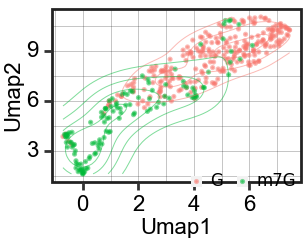

In [5]:
from scipy import interpolate
import traceback
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def interp(x):
    """
    Performs linear interpolation on a given list of values.

    Args:
        x (list): List of values to be interpolated.

    Returns:
        list: Interpolated values.

    """
    l=len(x)
    y=x
    x=np.linspace(0,l-1,l)
    f=interpolate.interp1d(x,y,kind='slinear')
    x_new=np.linspace(0,l-1,100)
    y_new=f(x_new)
    y_new=np.around(y_new,4)
    return y_new.tolist()

ref_file="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
ref_dict={}
with open(ref_file) as f:
    for line in f:
        line=line.rstrip()
        if ">" in line:
            chr=line[1:]
        else:
            seq=line
            ref_dict[chr]=seq


chr="G2"
site=115

motif=ref_dict[chr][site-2:site+3]
print("motif:",motif)

X=[]
Y=[]
label_dict={0:"G",1:"m7G"}

signal_files=["/home/wuyou/Projects/paper/ELIGOS_normalG/normalG.signal.tsv",
              "/home/wuyou/Projects/paper/ELIGOS_m7G/m7G.signal.tsv"]
for j,signal_file in enumerate(signal_files):
    with open(signal_file) as f:
        count=0
        for line in f:
            line=line.rstrip()
            chr=line.split("\t")[1]
            start=int(line.split("\t")[2])
            seq=line.split("\t")[3]
            signal_string=line.split("\t")[6]
            raw_signal=[base_signal_string.split("*") for base_signal_string in signal_string.split("|")]  
            if start > site or start+len(seq)-3<site or chr != "G2":
                continue
            kmer_raw_signal=raw_signal[site-(start-1)-2:site-(start-1)+3]
            kmer_sequence=seq[site-(start-1)-2:site-(start-1)+3]
            if len(kmer_raw_signal)==0:
                continue


            x=[]
            for i in range(5):                                 #resample to 500 points
                kmer_raw_signal[i]=interp(np.array(kmer_raw_signal[i],dtype=float))
                x.extend(kmer_raw_signal[i])
            X.append(x)
            Y.append(label_dict[j])
            count+=1
            if count>250:
                break


            
#reducer = PCA(n_components=2)
reducer=umap.UMAP()
embedding = reducer.fit_transform(X)

#print(len(Y))
#"#F8766D" "#00BA38" "#619CFF"

data=pd.DataFrame(embedding)
data.columns=["Umap1","Umap2"]
data["label"]=Y
data["G"]=[0]*len(Y)

data_G=data[data["label"]=="G"]
data_m7G=data[data["label"]=="m7G"]

data.to_csv("data/Umap_embedding_of_G_m7G_signals.csv")

p =(ggplot(aes(x='Umap1', y='Umap2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=0.5)
    +theme(
        figure_size=[1.52,1.22],
        axis_text=element_text(size=8,family="Arial",color="black"),
        axis_title_x=element_text(size=8,family="Arial",color="black"),
        axis_title_y=element_text(size=8,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.8,0.3), 
        legend_key_size=4) #change legend text font size))
    +scale_color_manual(values =[c1, c2, c3]) 
    +geom_density_2d(colour = "#F8766D",size=0.2,data=data_G,alpha=0.5)+geom_density_2d(colour = "#00BA38",size=0.2,data=data_m7G,alpha=0.5)
    +scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/figure_1d_signal_visualization_Umap_m7G.pdf')